In [23]:
import numpy as np

RETURN_VARIANCE = True

def median_laplace(x, epsilon, delta=None):
    """
    This function computes the differentially private estimate of the median 
    using the approach proposed in [1]. It uses the Laplace mechanism on page 
    10 and the smooth sensitivity of the median derivation found on page 12.
    
    The resulting value is (epsilon-delta) differentially private. By default,
    if not specified, delta is set to `1/(100*len(x))` so that there is a 99%
    chance that differential privacy is satisfied for any individual.

    [1] http://www.cse.psu.edu/~ads22/pubs/NRS07/NRS07-full-draft-v1.pdf
    """
    if not delta:
        delta = 1.0 / (100 * len(x))
    alpha = epsilon / 2.0
    beta = epsilon / (2.0 * np.log(2.0 / delta))
    
    x = np.array(x)
    x.sort()
    m = (len(x) + 1) // 2
    smooth_sensitivity = []
    for k in range(0, len(x)-m):
        local_sensitivity = max(x[m+t] - x[m+t-k-1] for t in range(0, k+1))
        smooth_sensitivity.append(np.exp(-k * beta) * local_sensitivity)
    smooth_sensitivity = max(smooth_sensitivity)
    
    if RETURN_VARIANCE:
        return 2*(smooth_sensitivity/alpha)**2
    return np.median(x) + smooth_sensitivity/alpha * np.random.laplace()

def median_gaussian(x, epsilon, delta=None):
    """
    This function computes the differentially private estimate of the median 
    using the approach proposed in [1]. It uses the Gaussian mechanism on page 
    10 and the smooth sensitivity of the median derivation found on page 12.

    The resulting value is (epsilon-delta) differentially private. By default,
    if not specified, delta is set to `1/(100*len(x))` so that there is a 99%
    chance that differential privacy is satisfied for any individual.

    [1] http://www.cse.psu.edu/~ads22/pubs/NRS07/NRS07-full-draft-v1.pdf
    """
    if not delta:
        delta = 1.0 / (100 * len(x))
    alpha = epsilon / (5.0 * np.sqrt(2.0 * np.log(2.0/delta)))
    beta = epsilon / (4.0 * (1.0 + np.log(2.0/delta)))
    
    x = np.array(x)
    x.sort()
    m = (len(x) + 1) // 2
    smooth_sensitivity = []
    for k in range(0, len(x)-m):
        local_sensitivity = max(x[m+t] - x[m+t-k-1] for t in range(0, k+1))
        smooth_sensitivity.append(np.exp(-k * beta) * local_sensitivity)
    smooth_sensitivity = max(smooth_sensitivity)

    if RETURN_VARIANCE:
        return smooth_sensitivity/alpha
    return np.median(x) + smooth_sensitivity/alpha * np.random.normal()

Text(0.5, 1.0, 'Gaussian')

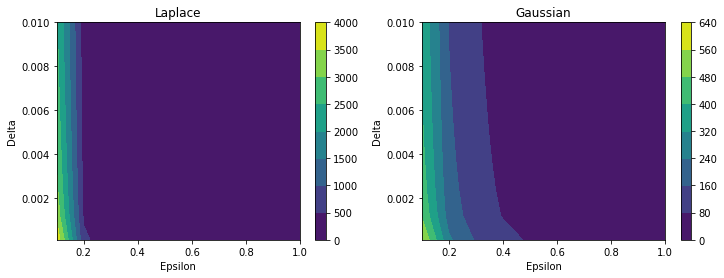

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(0.1, 1.0, 10)   # Epsilon ~ [0, 1]
y = np.linspace(0.0001, 0.01, 10) # Delta = 1/(100*n) -> 99% confident it won't fail
X, Y = np.meshgrid(x, y)
dataset = np.random.normal(loc=0.0, scale=1.0, size=100)

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
Z_laplace = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z_laplace[i,j] = median_laplace(dataset, epsilon=X[i,j], delta=Y[i,j])
CS = plt.contourf(X,Y,Z_laplace)
plt.xlabel("Epsilon")
plt.ylabel("Delta")
plt.colorbar(CS)
plt.gca().set_title('Laplace')

plt.subplot(1, 2, 2)
Z_gaussian = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z_gaussian[i,j] = median_gaussian(dataset, epsilon=X[i,j], delta=Y[i,j])
CS = plt.contourf(X,Y,Z_gaussian)
plt.xlabel("Epsilon")
plt.ylabel("Delta")
plt.colorbar(CS)
plt.gca().set_title('Gaussian')